In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg

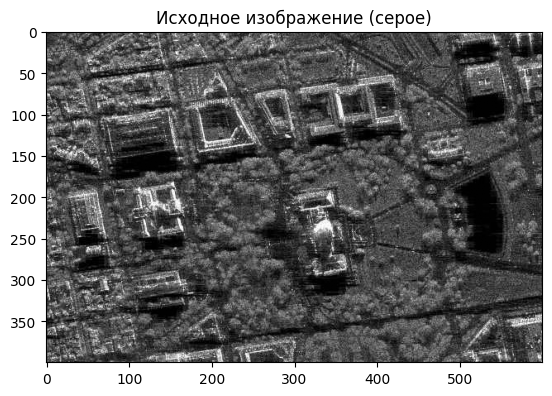

Размер изображения: (400, 600)


In [16]:
image_gray = cv2.imread("sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение (серое)")
plt.show()

print("Размер изображения:", image_gray.shape) # высота*ширина*каналы

# 2. Постройте гистограмму

C:\Users\Лиза\AppData\Local\Temp\ipykernel_28496\4209111721.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_gray.ravel(), 256, [0, 256])


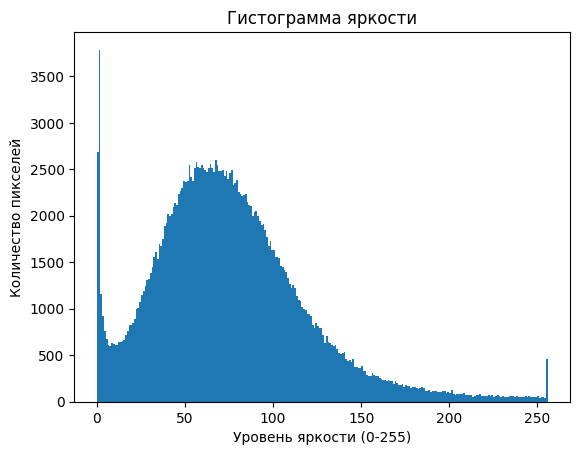

In [12]:
plt.hist(image_gray.ravel(), 256, [0, 256])
plt.title("Гистограмма яркости")
plt.xlabel("Уровень яркости (0-255)")
plt.ylabel("Количество пикселей")
plt.show()

# 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1

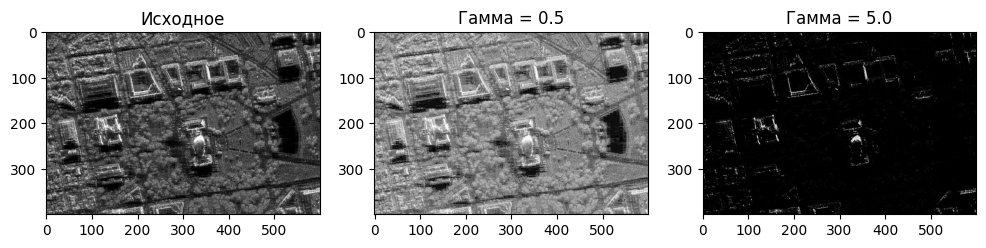

In [ ]:
def gamma_correction(image, gamma):
    corrected = np.power(image / 255.0, gamma) * 255
    return corrected.astype(np.uint8)

gamma_low = 0.5   
gamma_high = 5.0 

img_gamma_low = gamma_correction(image_gray, gamma_low)
img_gamma_high = gamma_correction(image_gray, gamma_high)


plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(image_gray, cmap="gray"); plt.title("Исходное")
plt.subplot(1,3,2); plt.imshow(img_gamma_low, cmap="gray"); plt.title("Гамма = 0.5")
plt.subplot(1,3,3); plt.imshow(img_gamma_high, cmap="gray"); plt.title("Гамма = 5.0")
plt.show()

# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM

Гамма = 0.5: MSE = 3250.43, SSIM = 0.7734
Гамма = 5.0: MSE = 6080.20, SSIM = 0.0647


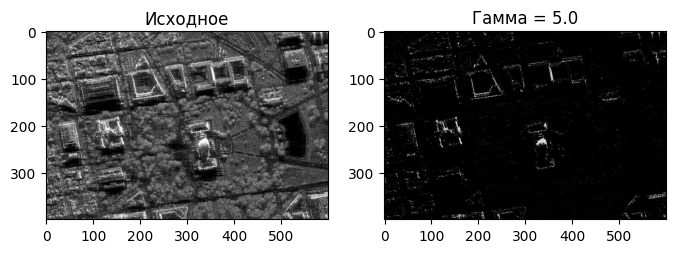

In [24]:
gamma_images = [(img_gamma_low, "Гамма = 0.5"), (img_gamma_high, "Гамма = 5.0")]

for img, name in gamma_images:
    mse = mean_squared_error(image_gray, img)

    ssim, _ = structural_similarity(image_gray, img, full=True, win_size=3)
    print(f"{name}: MSE = {mse:.2f}, SSIM = {ssim:.4f}")
    
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(image_gray, cmap="gray"); plt.title("Исходное")
plt.subplot(1,2,2); plt.imshow(img, cmap="gray"); plt.title(name)
plt.show()

# 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray

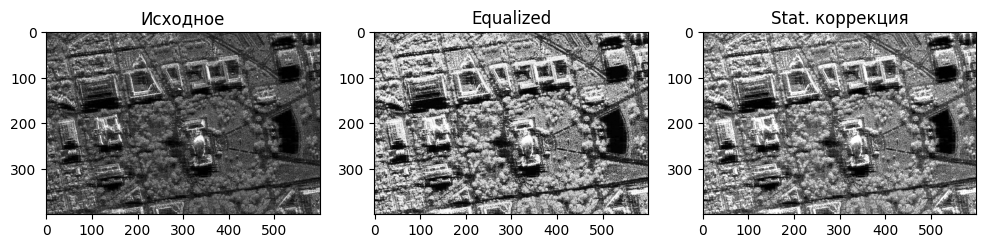

In [ ]:
eq_gray = cv2.equalizeHist(image_gray)

mean_src, std_src = image_gray.mean(), image_gray.std()
mean_ref, std_ref = eq_gray.mean(), eq_gray.std()

stat_corrected = ( (image_gray - mean_src) * (std_ref/std_src) + mean_ref )
stat_corrected = np.clip(stat_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(image_gray,cmap="gray"); plt.title("Исходное")
plt.subplot(1,3,2); plt.imshow(eq_gray,cmap="gray"); plt.title("Equalized")
plt.subplot(1,3,3); plt.imshow(stat_corrected,cmap="gray"); plt.title("Stat. коррекция")
plt.show()

# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами

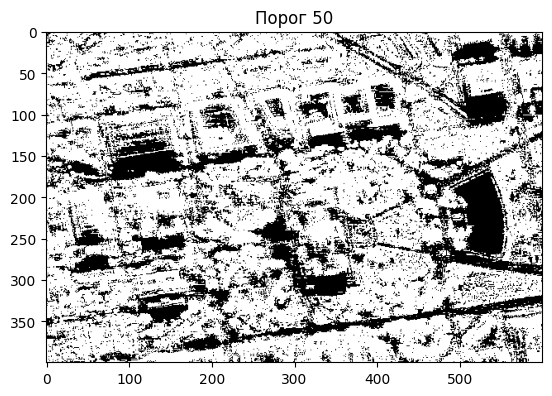

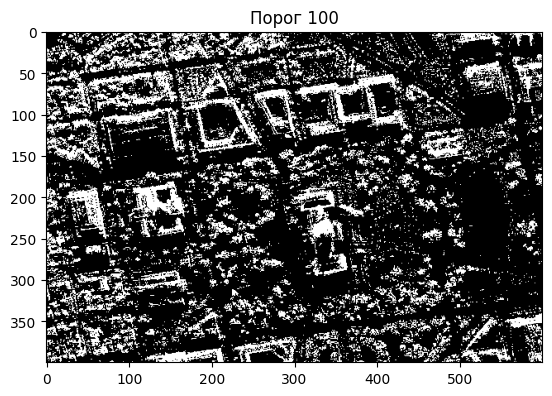

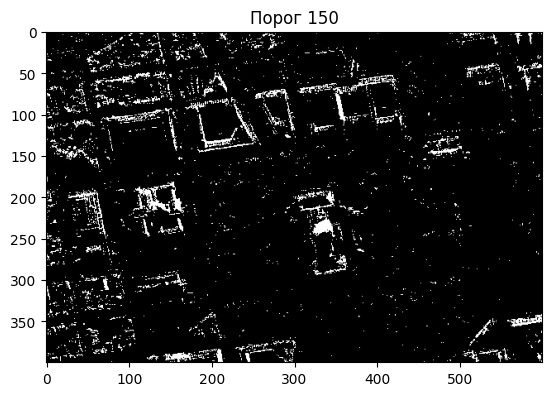

In [26]:
for thresh in [50, 100, 150]:
    _, th = cv2.threshold(image_gray, thresh, 255, cv2.THRESH_BINARY)
    plt.imshow(th, cmap="gray")
    plt.title(f"Порог {thresh}")
    plt.show()